# Modelos Competitivos

## Introducción 

La base de este modelo competitivo es la ecuación logísitca:

$$\frac{dP}{dt}=kP\biggl(1-\frac{P}{S}\biggr)$$

Con el fin de convertir esta ecuación a dos o más especies de forma vectorial, cambiemos nuestra notación:

$$\frac{dx_1}{dt}=k_1 x_1\biggl(1-\frac{x_1}{S_1}\biggr)$$

para referirnos al hecho de que sólo estamos manejando una especie $x_1$ con tasa de crecimiento $k_1$ y capacidad de carga $S_1$.

Con el fin de presentar la idea central, recordemos las ecuaciones de **Lotka-Volterra**:

\begin{align*} 
\frac{dx_{1}}{dt} & =k_{1}x_{1}-\alpha_{12} x_{1}x_{2} \\
\frac{dx_{2}}{dt} & =\alpha_{21} x_{1}x_{2}-k_{2}x_{2} \\
\end{align*}

Si olvidamos por un momento el hecho de que tenga que existir un depredador y una presa, es decir, si sólo tenemos en cuenta la interacción de las especies individualmente **compitiendo por la supervivencia** (es decir, la adaptación biológica de uno reduce la existencia del otro), podríamos generar el siguiente modelo:

\begin{align*} 
\frac{dx_{1}}{dt} & =k_{1}x_{1}-\alpha_{12} x_{1}x_{2} = k_{1}x_{1}\bigl(1-\alpha_{12}x_{2}\bigr)\\
\frac{dx_{2}}{dt} & =k_{2}x_{2}-\alpha_{21} x_{1}x_{2} = k_{2}x_{2}\bigl(1-\alpha_{21}x_{1}\bigr)\\
\end{align*}

Teniendo en cuenta estas dos bases, a continuación presentamos un **modelo competitivo**.

## Modelo 

### Dos Especies 

Combinando las hipótesis del apartado anterior, podemos llegar al siguiente modelo:

\begin{align*} 
\frac{dx_{1}}{dt} & =k_{1}x_{1}\biggl(1-\biggl(\frac{x_{1}+\alpha_{12}x_{2}}{S_1}\biggr)\biggr) \\
\frac{dx_{2}}{dt} & =k_{2}x_{2}\biggl(1-\biggl(\frac{x_{2}+\alpha_{21}x_{1}}{S_2}\biggr)\biggr) \\
\end{align*}

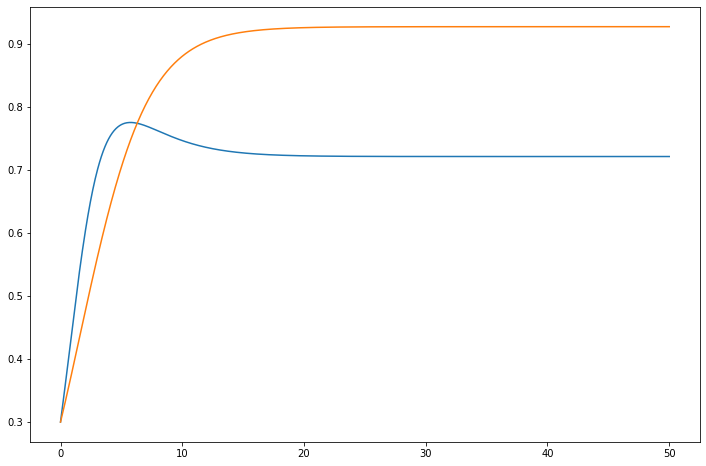

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from Solver_EDOS import *

##HP##

k=[0.8,0.4]

α=np.array([[1.0, 0.3],
            [0.1, 1.0]])

S=[1,1]

F=lambda t,X:np.array([ k[0]*X[0]*(1-(X[0]+α[0,1]*X[1])/S[0]),
                        k[1]*X[1]*(1-(X[1]+α[1,0]*X[0])/S[1])])
X0=[0.3,0.3]
T=[0,50]

### NP ####
n=1000

###### Solving Model ######

t,X=RK38(F,X0,T,n)

##### Graphics #####
plt.figure(figsize=(12,8))

plt.plot(t,X[:,0],t,X[:,1])
plt.show()

### N-Especies

$$\frac{dx_{i}}{dt} =k_{i}x_{i}\biggl(1-\frac{\sum_{j=1}^{N}\alpha_{ij}x_{i}}{S_i}\biggr)$$

O, de forma más compacta, si condensamos la capacidad de carga dentro de los $\alpha$, podemos escribir la ecuación como:

$$\frac{dx_{i}}{dt} =k_{i}x_{i}\biggl(1-\sum_{j=1}^{N}\alpha_{ij}x_{i}\biggr)$$

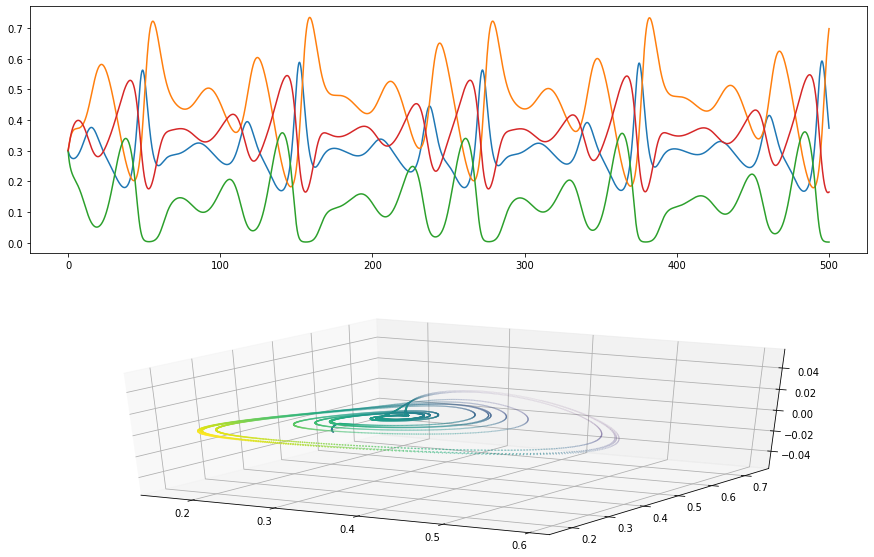

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from Solver_EDOS import *

##HP##

k=np.array([1,0.72,1.53,1.27])

α=np.array([[1.00, 1.09, 1.52, 0.00],
            [0.00, 1.00, 0.44, 1.36],
            [2.33, 0.00, 1.00, 0.47],
            [1.21, 0.51, 0.35, 1.00]])

S=[1,1,1,1]

F=lambda t,X:np.array(k*X*(1-np.dot(α,X)))
X0=[0.3,0.3,0.3,0.3]
T=[0,500]

### NP ####
n=10000

###### Solving Model ######

t,X=RK38(F,X0,T,n)

##### Graphics #####
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(t,X[:,0],t,X[:,1],t,X[:,2],t,X[:,3])
plt.subplot(212, projection="3d")
plt.scatter(X[:,0],X[:,1],X[:,2],c=X[:,3])
plt.show()